# Question 1

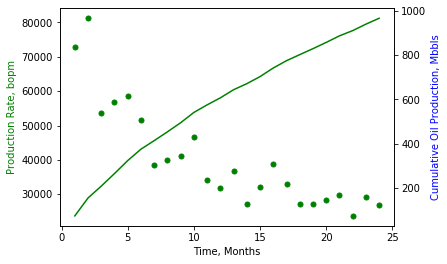

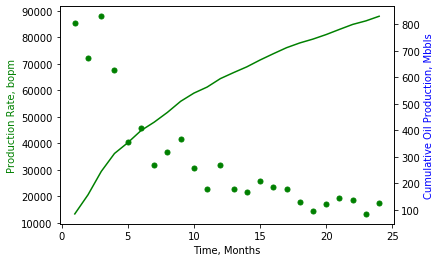

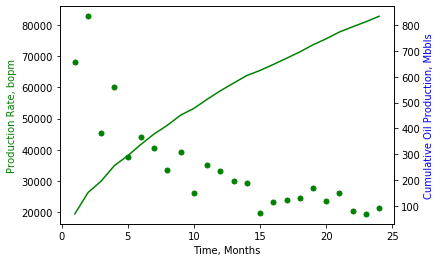

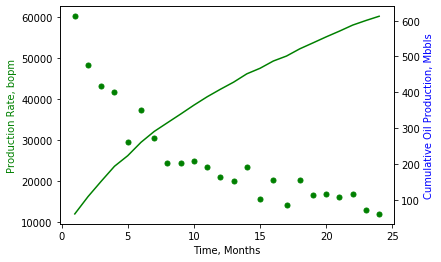

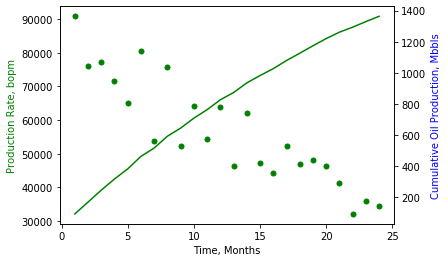

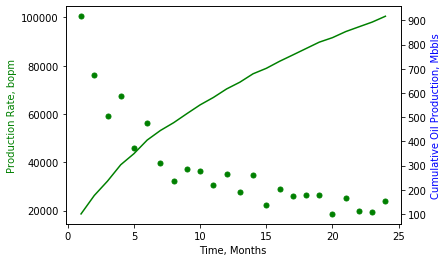

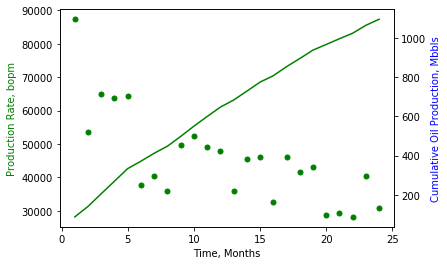

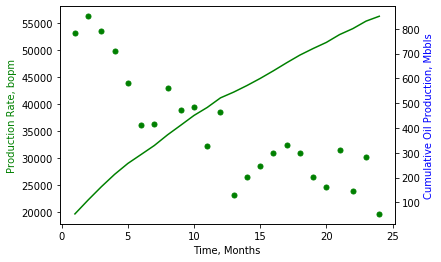

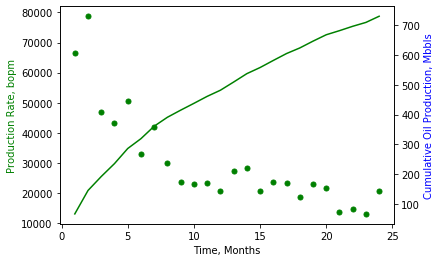

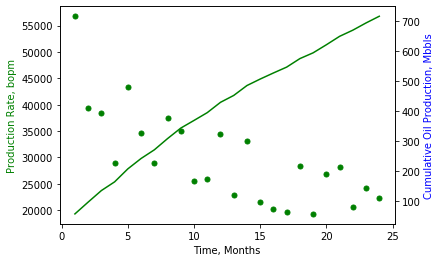

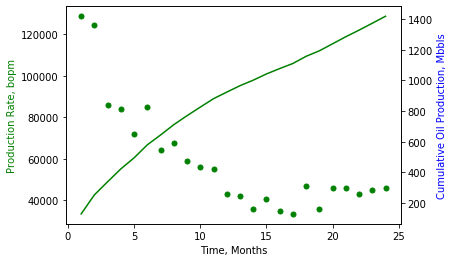

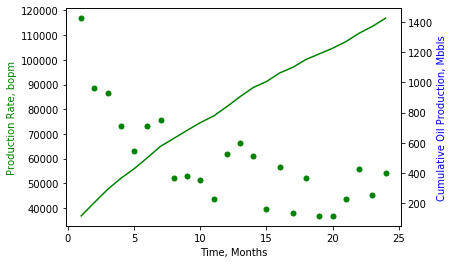

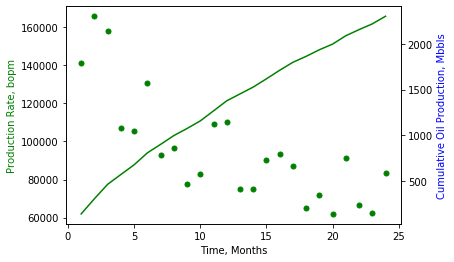

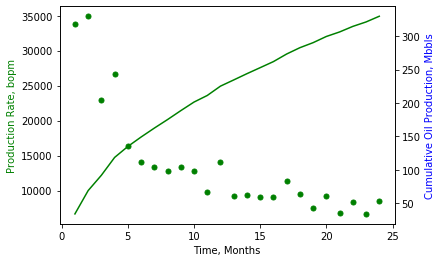

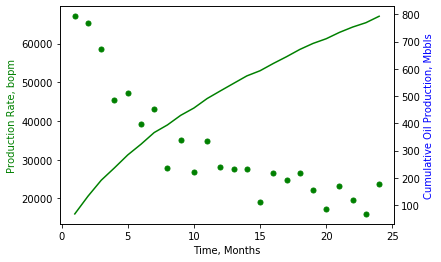

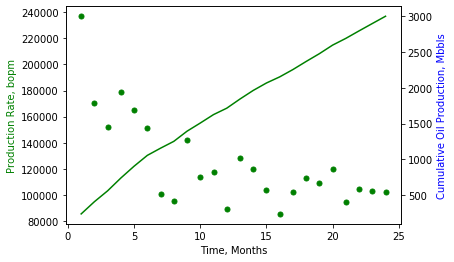

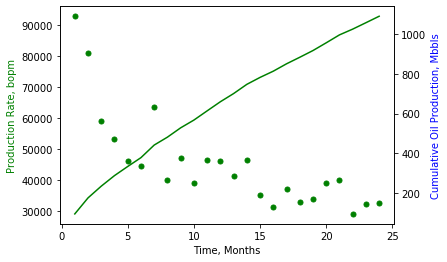

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3
%matplotlib inline
titleFontSize = 18
axisLabelFontSize = 15
axisNumFontSize = 13
conn = sqlite3.connect('DCA.db')
cur = conn.cursor()
for wellID in range(1,18):
    prodDF = pd.read_sql_query(f"SELECT time,rate, Cum,Cum_model FROM Rates WHERE  wellID={wellID};", conn)
    dcaDF = (f"SELECT *FROM DCAparams;", conn)
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    ax1.plot(prodDF['time'], prodDF['rate'], color = "green", ls = 'None', marker = 'o', markersize = 5,)
    ax2.plot(prodDF['time'], prodDF['Cum']/1000, 'g-')
    ax1.set_xlabel('Time, Months')
    ax1.set_ylabel('Production Rate, bopm', color='g')
    ax2.set_ylabel('Cumulative Oil Production, Mbbls', color='b')
    plt.show()

# Question 2

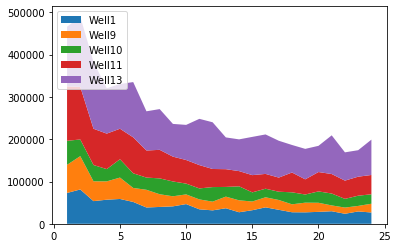

In [6]:
for wellID in range(1,18):
    prodDF = pd.read_sql_query(f"SELECT time FROM Rates WHERE wellID={wellID};", conn)
    dcaDF = pd.read_sql_query(f"SELECT wellID FROM DCAparams WHERE fluid ='gas';", conn)
x = 1
for s in dcaDF['wellID']:
    prodDF['Well' + str(s)] = pd.read_sql_query(f"SELECT rate FROM Rates WHERE wellID = {s};", conn )
production = prodDF.iloc[:,1:].to_numpy()
time = prodDF['time'].to_numpy()
labels = prodDF.columns
labels = list(labels[1:])
fig, ax = plt.subplots()
ax.stackplot(time,np.transpose(production), labels=labels)
ax.legend(loc='upper left')
plt.show()

# Question 3

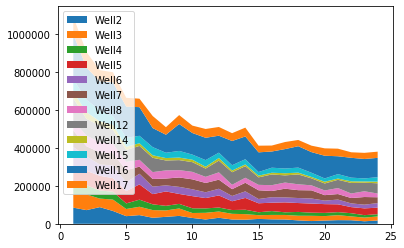

In [3]:
for wellID in range(1,18):
    prodDF = pd.read_sql_query(f"SELECT time FROM Rates WHERE wellID={wellID};", conn)
    dcaDF = pd.read_sql_query(f"SELECT wellID FROM DCAparams WHERE fluid ='oil';", conn)
x = 1
for s in dcaDF['wellID']:
    prodDF['Well' + str(s)] = pd.read_sql_query(f"SELECT rate FROM Rates WHERE wellID = {s};", conn )
production = prodDF.iloc[:,1:].to_numpy()
time = prodDF['time'].to_numpy()
labels = prodDF.columns
labels = list(labels[1:])
fig, ax = plt.subplots()
ax.stackplot(time,np.transpose(production), labels=labels)
ax.legend(loc='upper left')
plt.show()

# Question 4

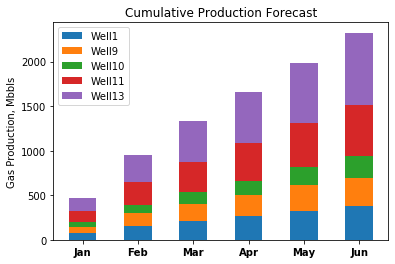

In [18]:
N = 6
ind = np.arange(1,N+1)    
months = ['Jan','Feb','Mar','Apr','May','Jun']
result = np.zeros(len(months))
labels = []
loc_plots = []
width = 0.5
cumDF = pd.DataFrame(prodDF['time'])
dcaDF = pd.read_sql_query(f"SELECT wellID FROM DCAparams WHERE fluid = 'gas';", conn)
for a in dcaDF['wellID']:
    cumDF['Well'+ str(a)] =pd.read_sql_query(f"SELECT Cum FROM Rates WHERE wellID = {a};", conn)
a = 1
for x in dcaDF['wellID']:
    p1 = plt.bar(cumDF['time'][0:X], cumDF['Well'+ str(x)][0:X]/1000, width, bottom = result)
    labels.append('Well'+ str(x))
    loc_plots.append(p1)
    plt.ylabel('Gas Production, Mbbls')
    plt.title('Cumulative Production Forecast')
    plt.xticks(ind, months, fontweight='bold')
    a+=1
    split = cumDF.iloc[0:6, 1:a].values
    result = np.sum(a = split, axis = 1)/1000
plt.legend(loc_plots, labels)
plt.show(loc_plots)

# Question 5

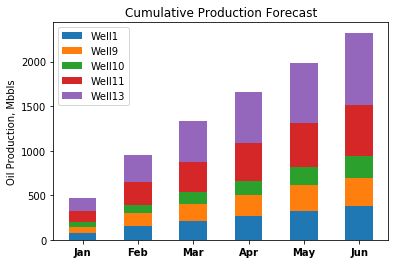

In [21]:
N = 6
ind = np.arange(1,N+1)   
months = ['Jan','Feb','Mar','Apr','May','Jun']
result = np.zeros(len(months))
labels = []
loc_plots = []
width = 0.5
cumDF = pd.DataFrame(prodDF['time'])
dcaDF = pd.read_sql_query(f"SELECT wellID FROM DCAparams WHERE fluid = 'gas';", conn)
for a in dcaDF['wellID']:
    cumDF['Well'+ str(a)] =pd.read_sql_query(f"SELECT Cum FROM Rates WHERE wellID = {a};", conn)
a = 1
for x in dcaDF['wellID']:
    p1 = plt.bar(cumDF['time'][0:X], cumDF['Well'+ str(x)][0:X]/1000, width, bottom = result)
    labels.append('Well'+ str(x))
    loc_plots.append(p1)
    plt.ylabel('Oil Production, Mbbls')
    plt.title('Cumulative Production Forecast')
    plt.xticks(ind, months, fontweight='bold')  
    a+=1
    split = cumDF.iloc[0:6, 1:a].values
    result = np.sum(a = split, axis = 1)/1000
plt.legend(loc_plots, labels)
plt.show(loc_plots)

# Question 6

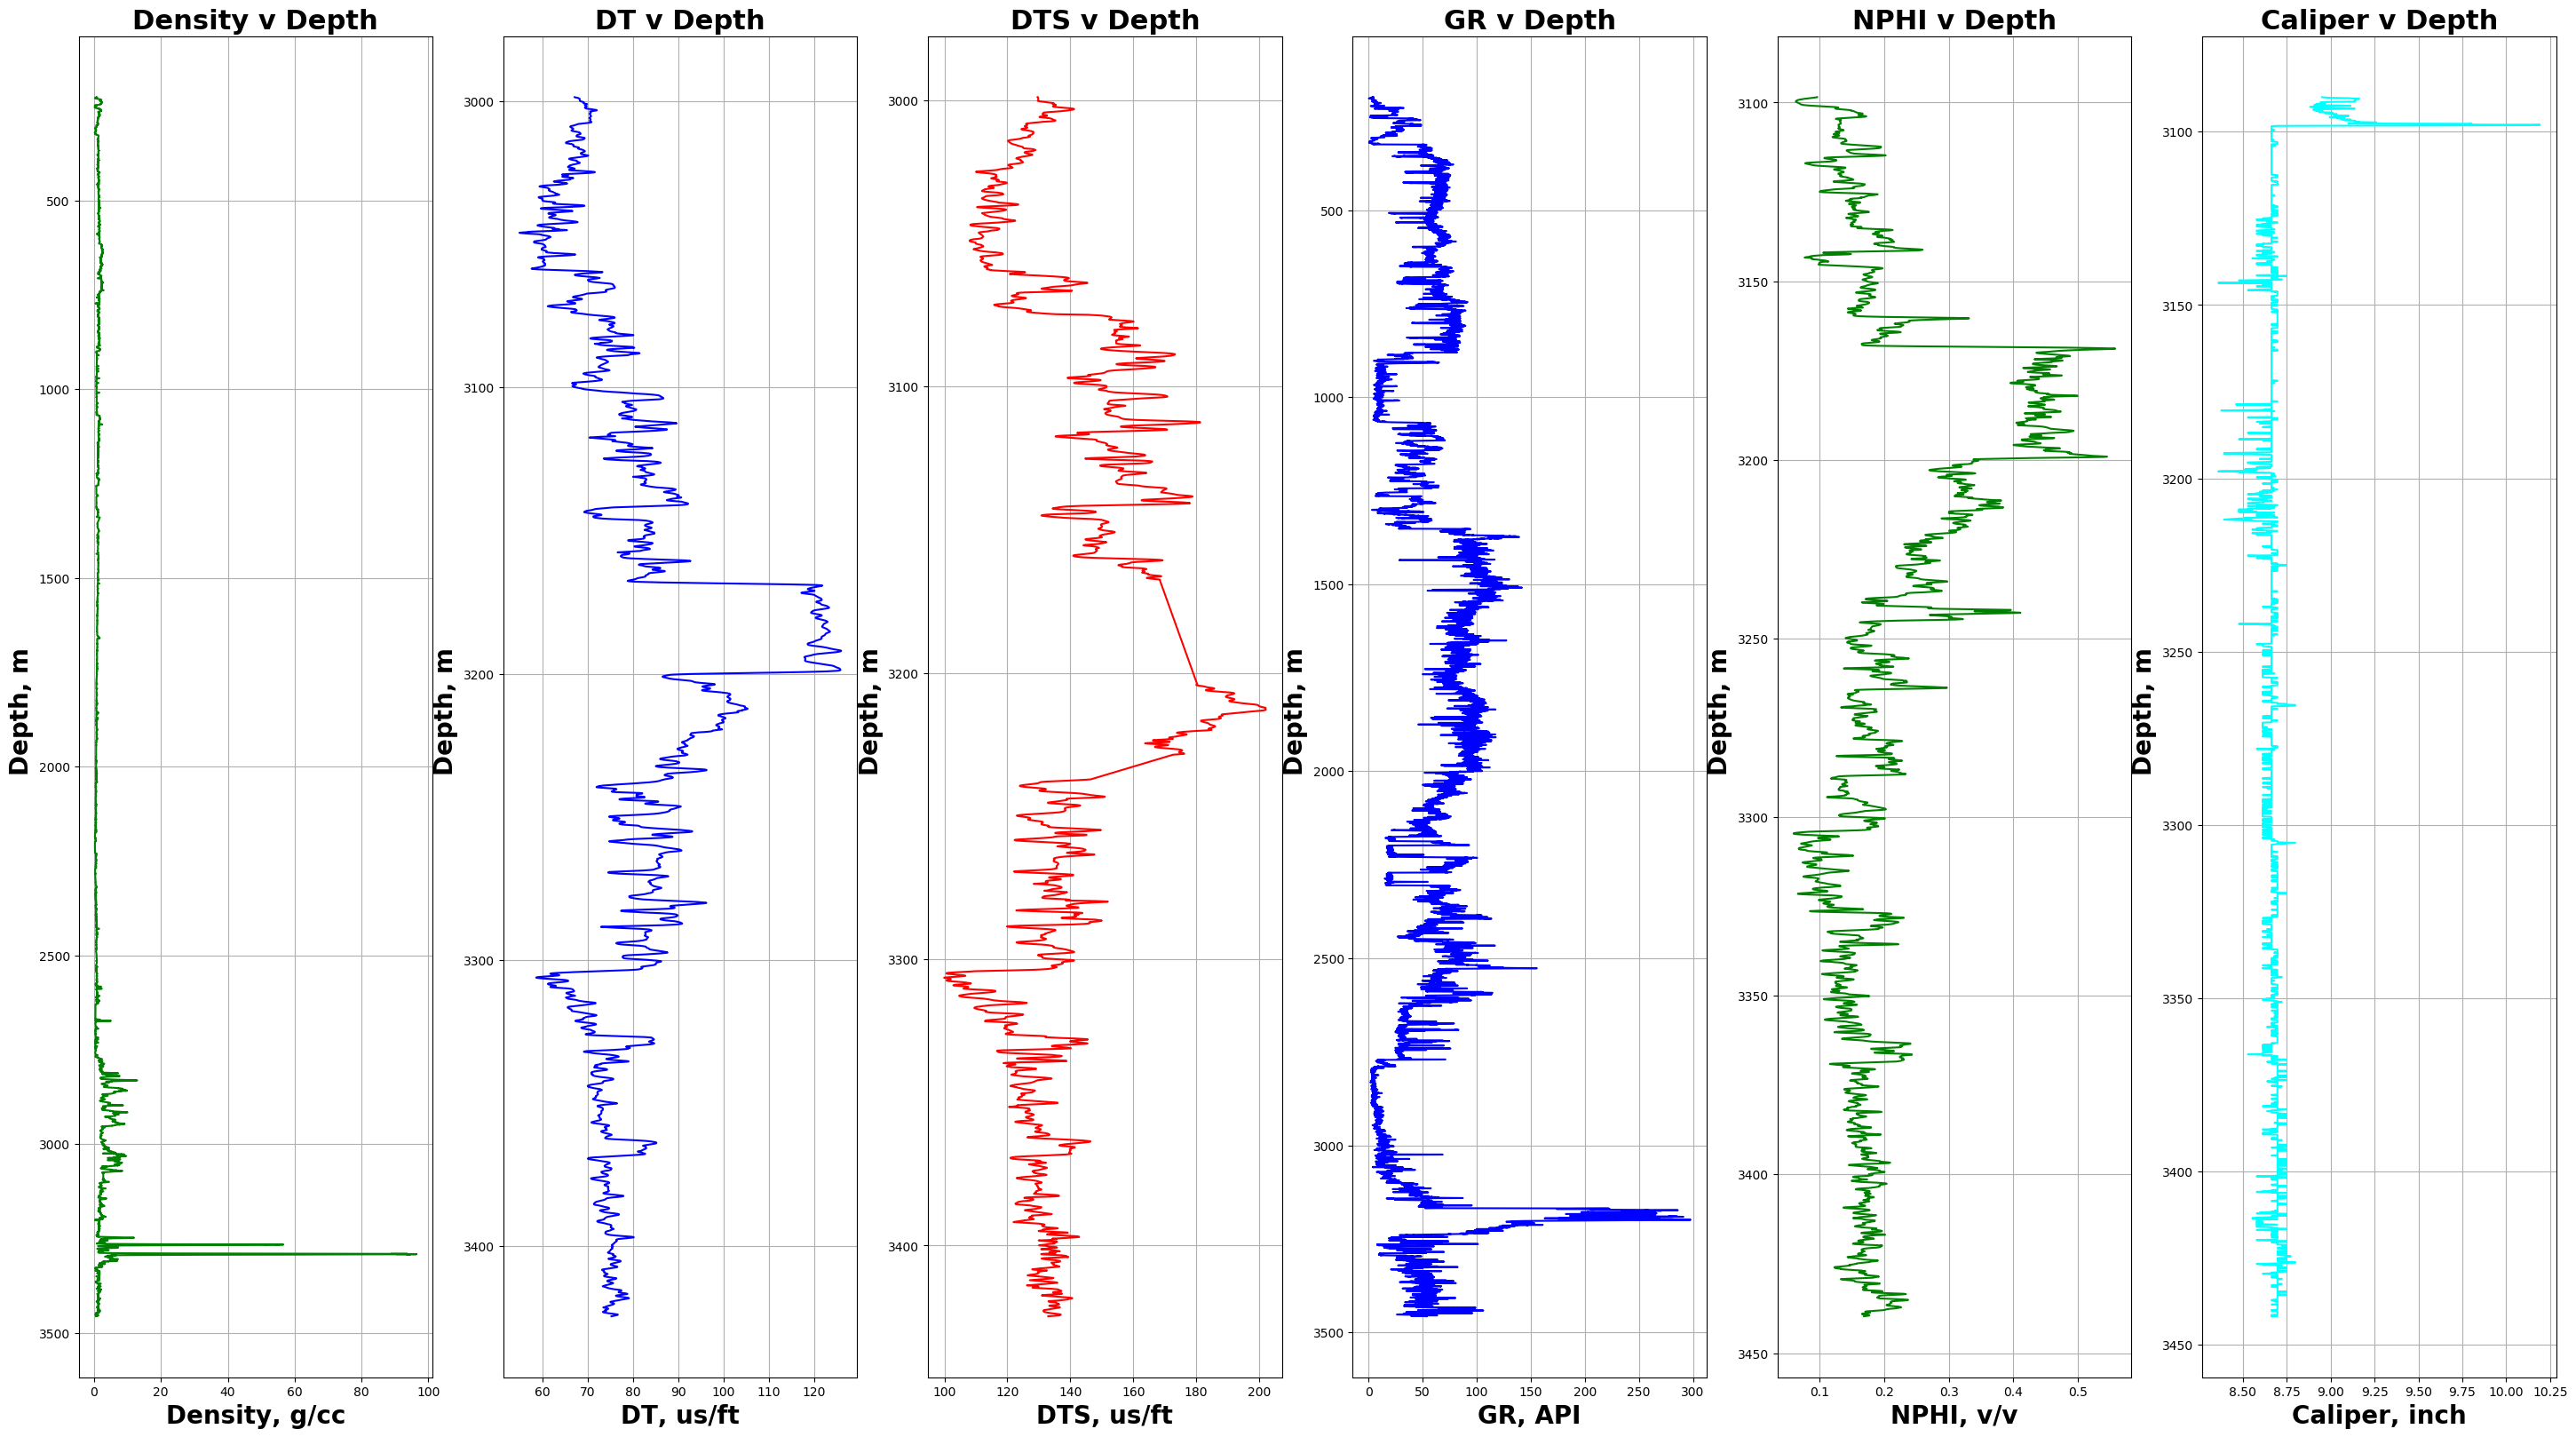

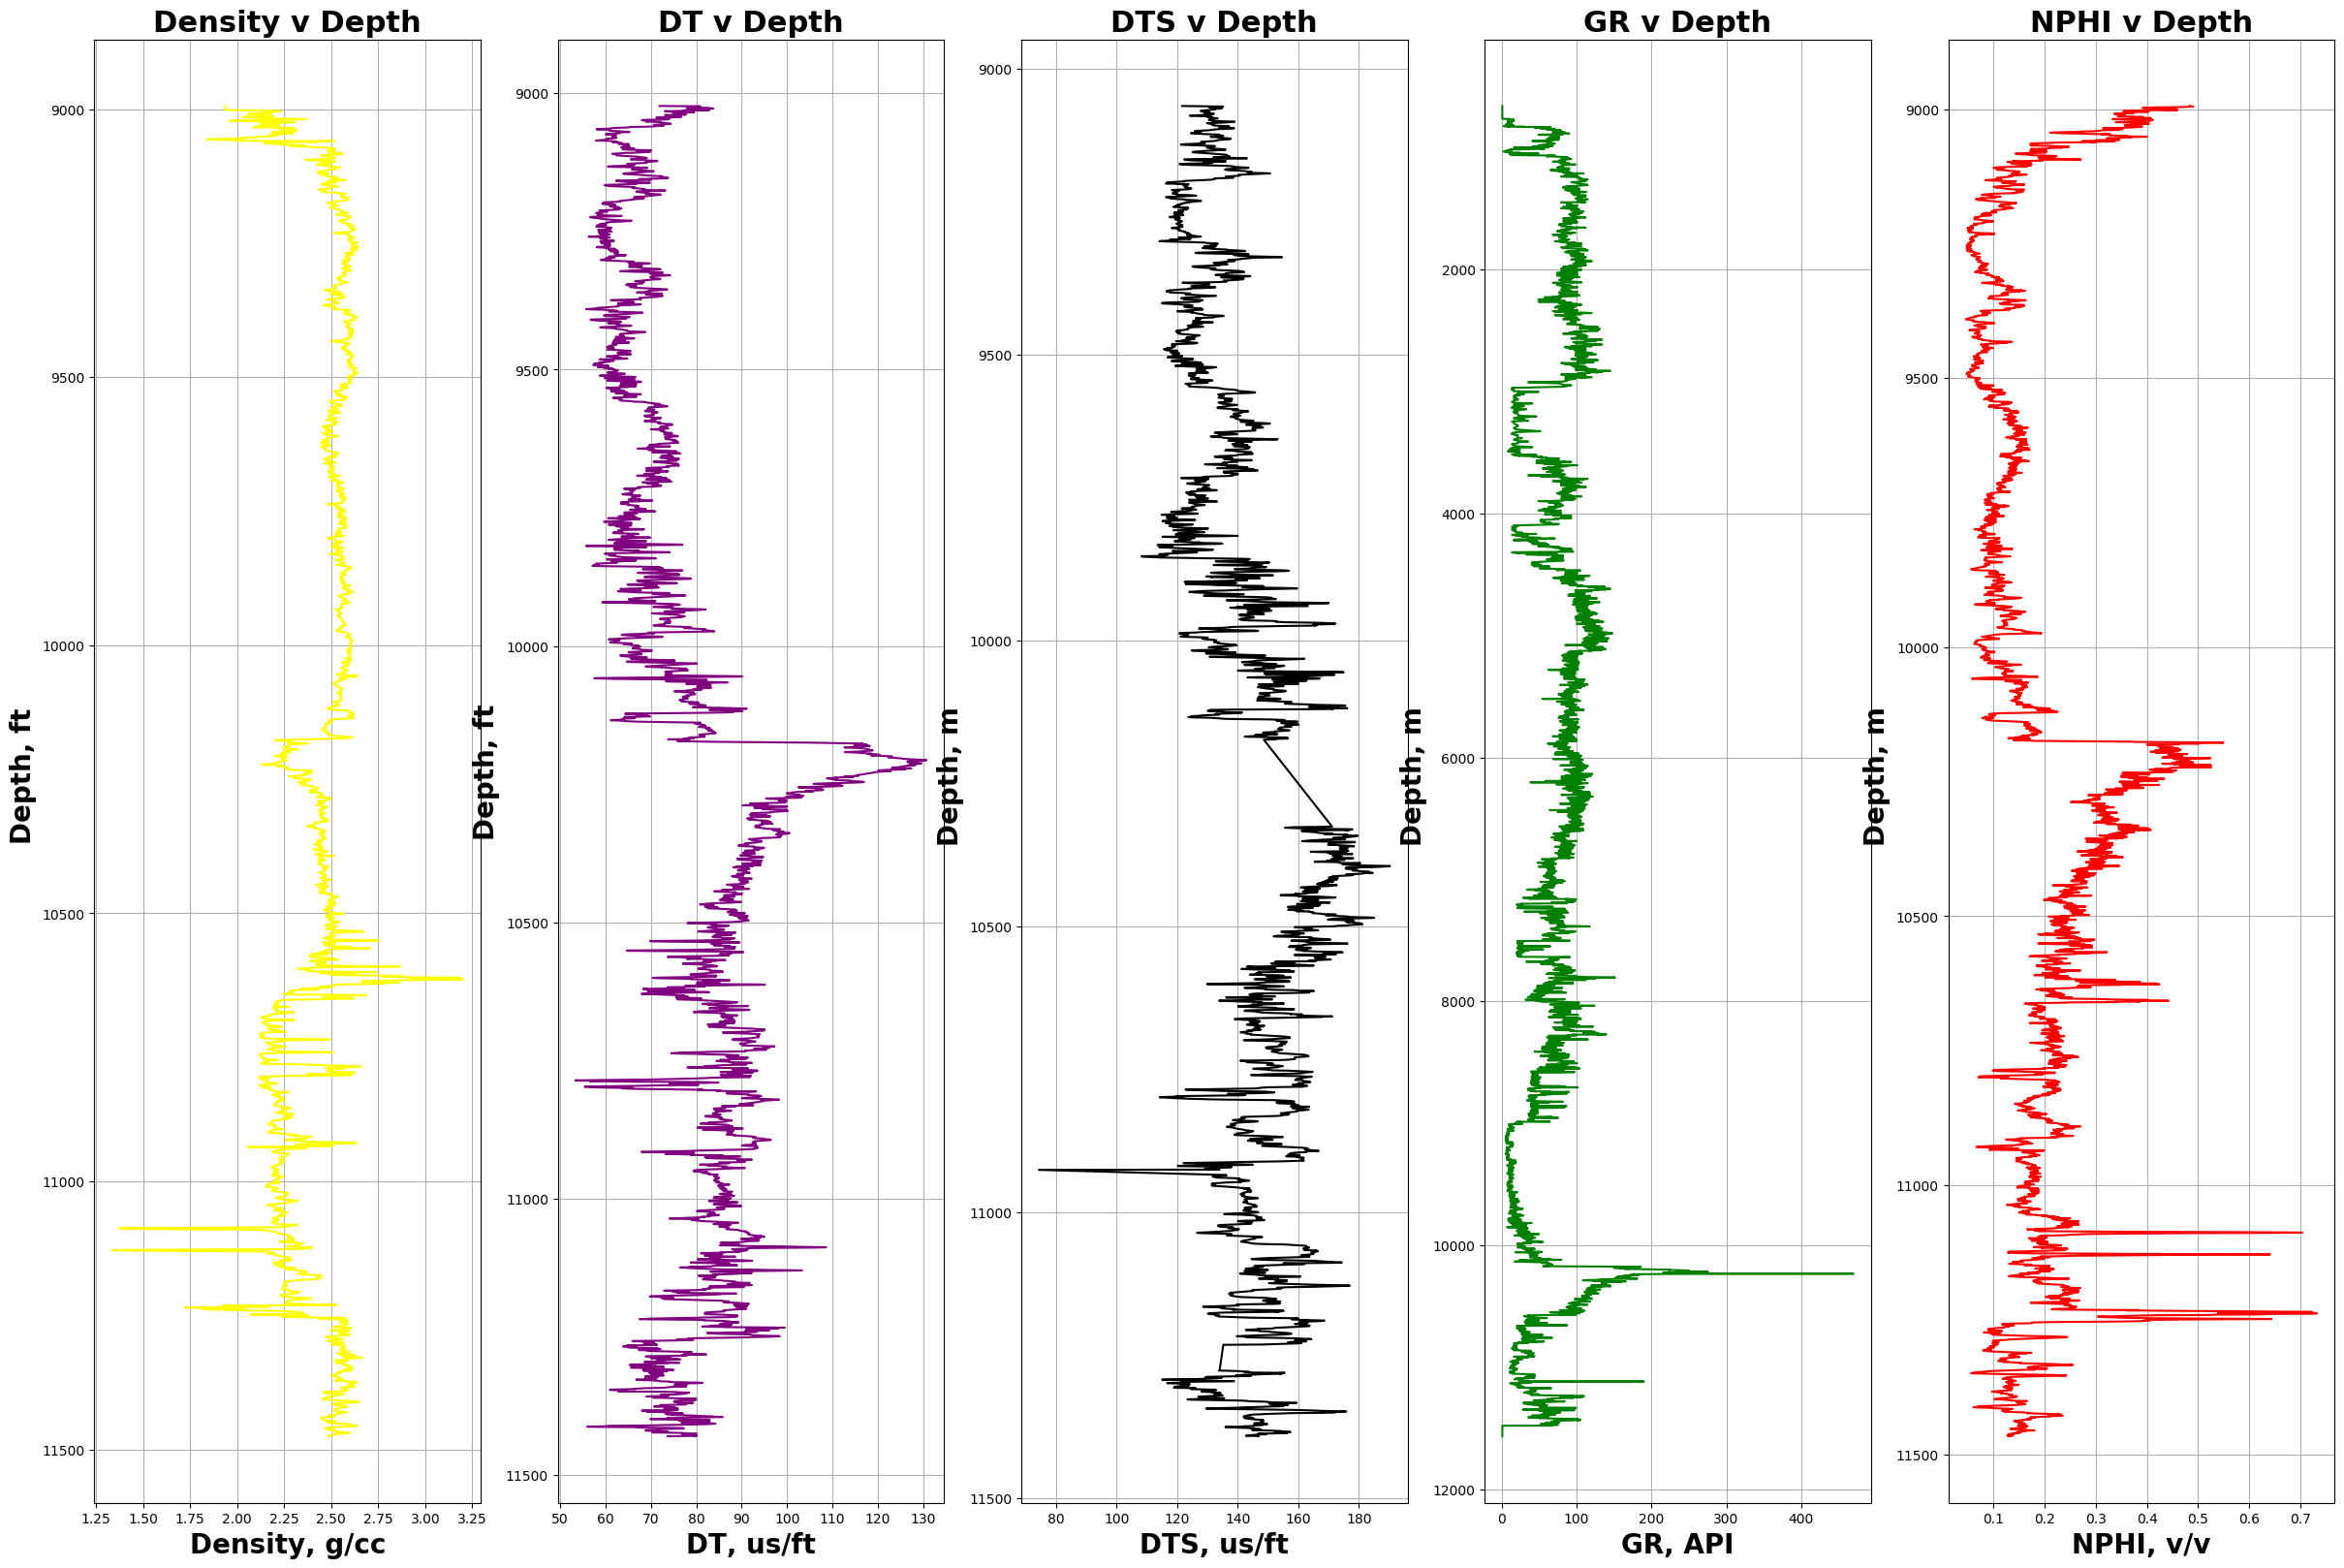

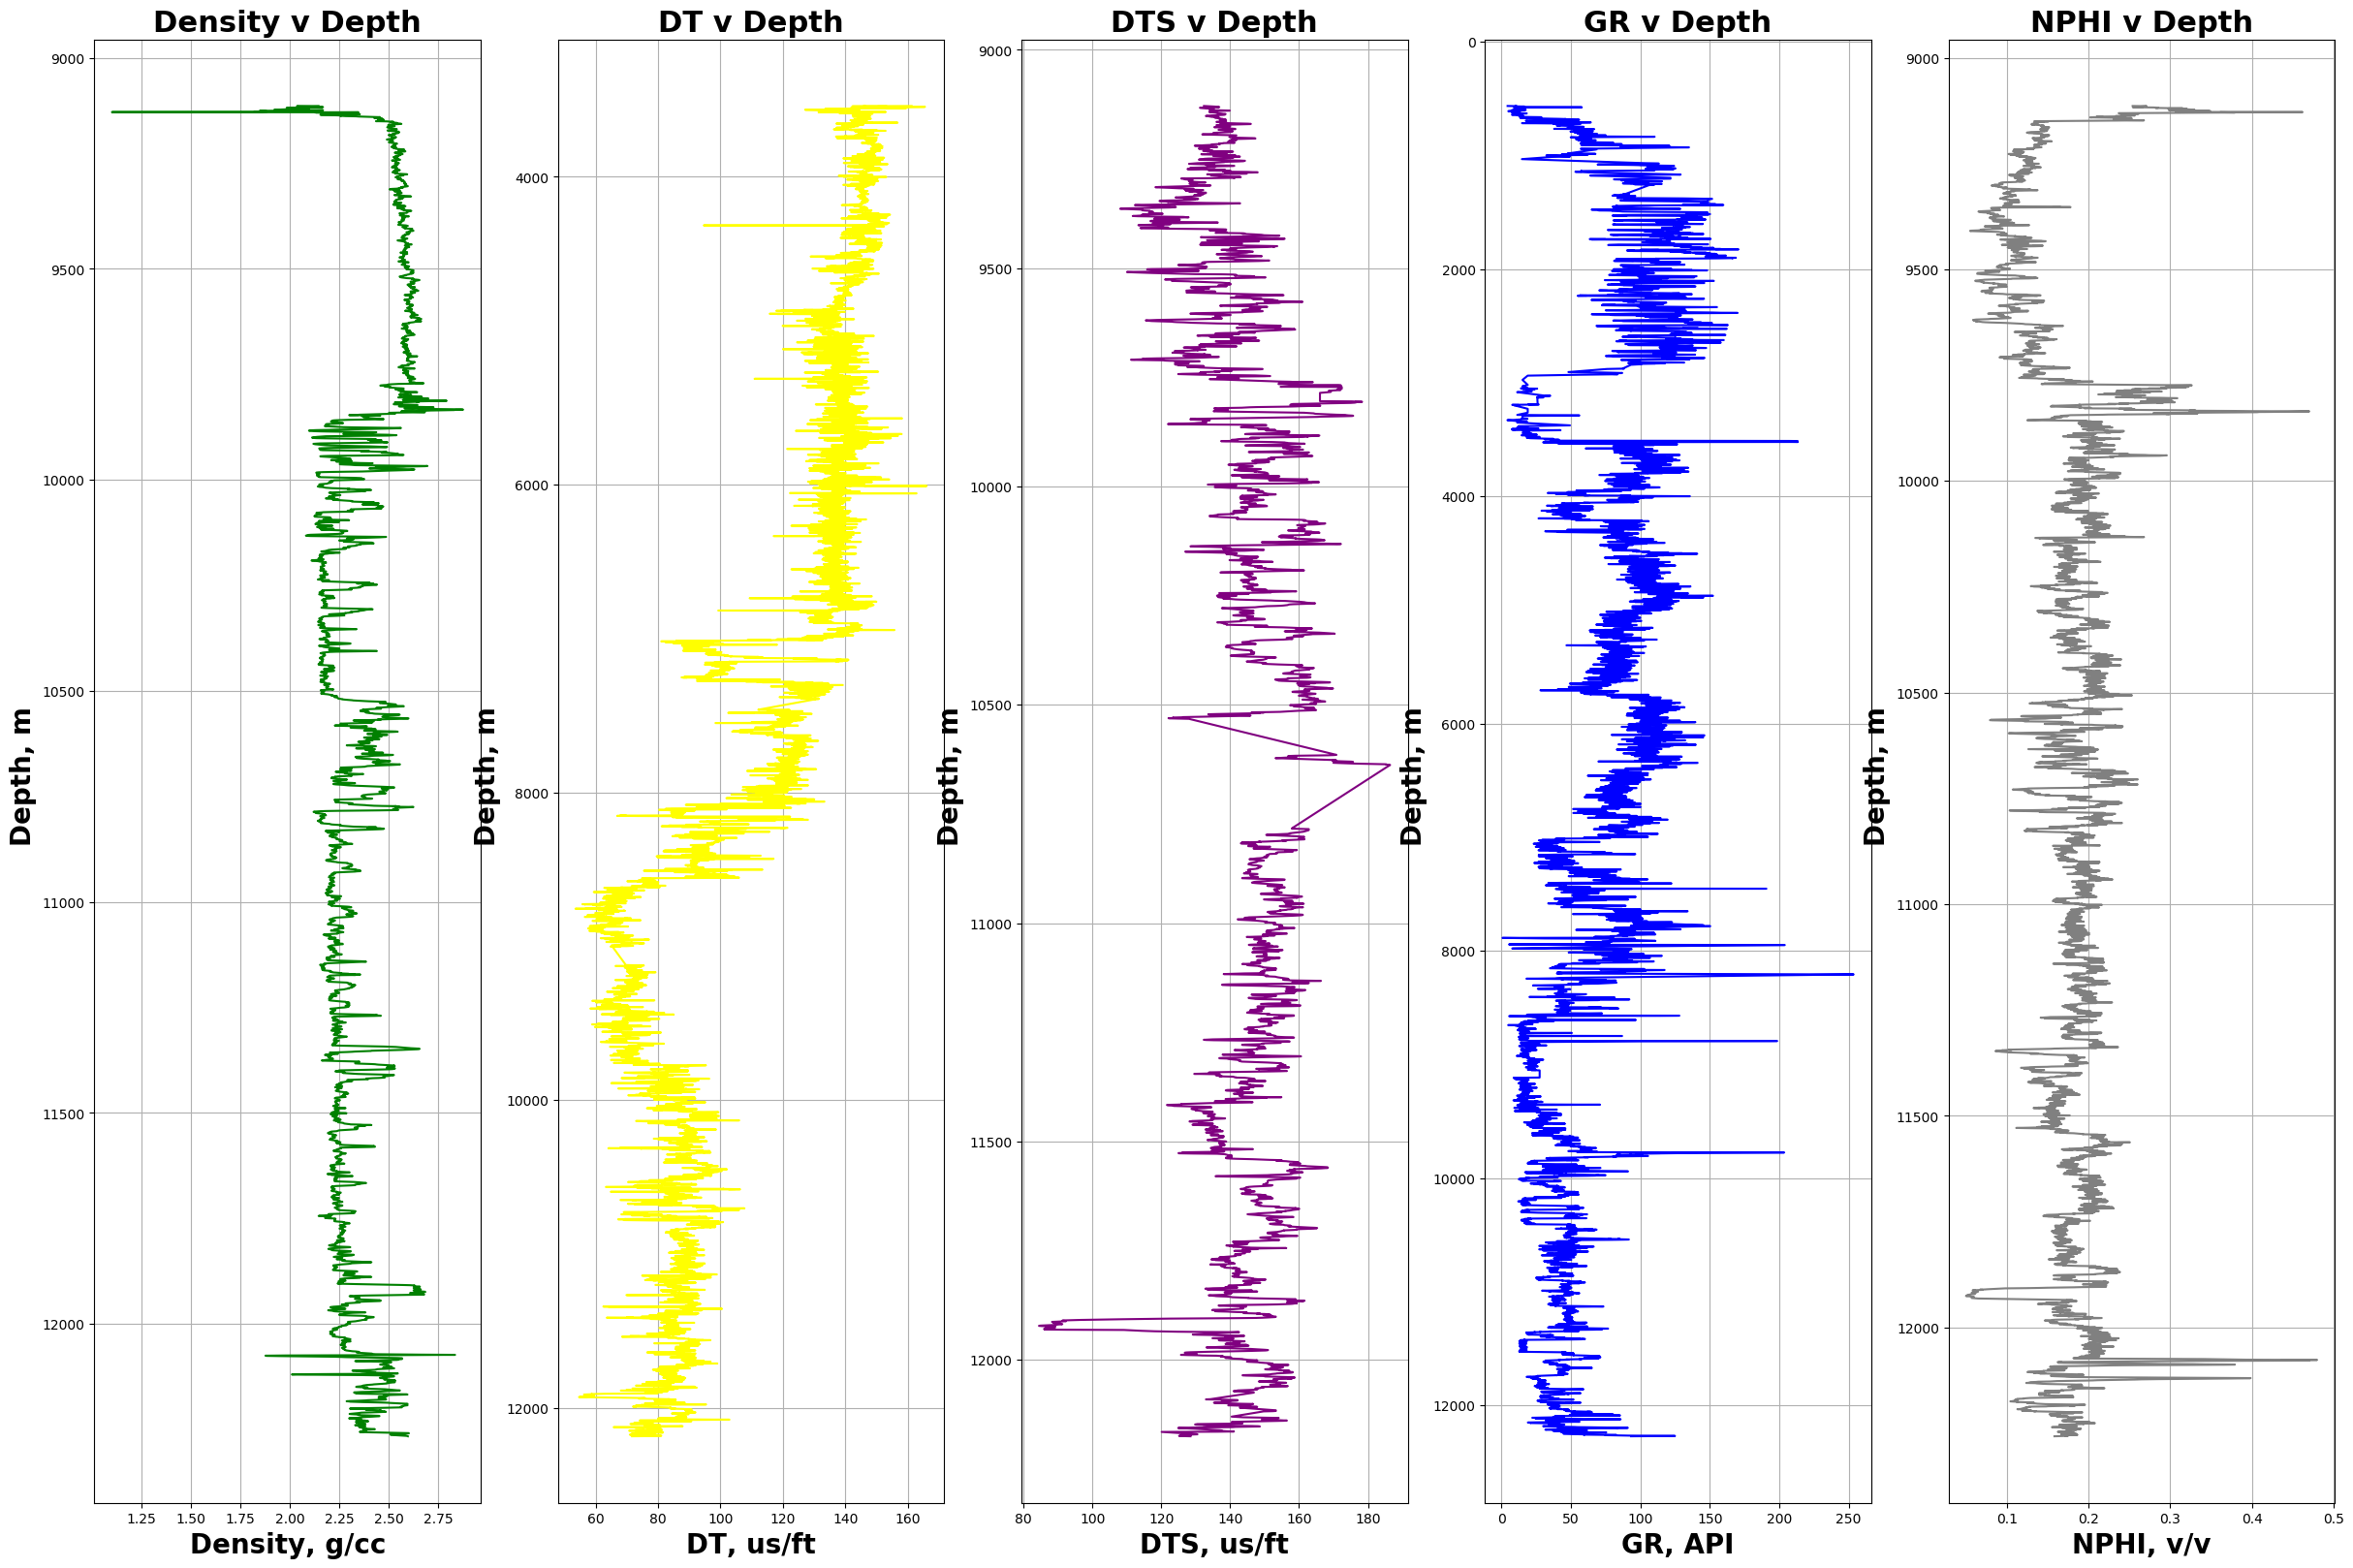

In [22]:
data1 = np.loadtxt("volve_logs/volve_logs/15_9-F-1B_INPUT.LAS", skiprows = 69)
DZ1, rho1 = data1[:,0], data1[:,16]
DZ1 = DZ1[np.where(rho1>0)]
rho1 = rho1[np.where(rho1>0)]
titleFontSize=22
fontSize=20
fig=plt.figure(figsize=(36,20),dpi=100)
fig.tight_layout(pad=1, w_pad=4, h_pad=2)
plt.subplot(1,6,1)
plt.grid(axis='both')
plt.plot(rho1,DZ1, color='green')
plt.title('Density v Depth', fontsize=titleFontSize, fontweight='bold')
plt.xlabel('Density, g/cc', fontsize = fontSize, fontweight='bold')
plt.ylabel('Depth, m ', fontsize = fontSize, fontweight='bold')
plt.gca().invert_yaxis()
DZ1, DT1 =data1[:, 0], data1[:,8]
DZ1=DZ1[np.where(DT1>0)]
DT1=DT1[np.where(DT1>0)]
plt.subplot(1,6,2)
plt.grid(axis='both')
plt.plot(DT1,DZ1, color='blue')
plt.title('DT v Depth', fontsize=titleFontSize, fontweight='bold')
plt.xlabel('DT, us/ft', fontsize = fontSize, fontweight='bold')
plt.ylabel('Depth, m ', fontsize = fontSize, fontweight='bold')
plt.gca().invert_yaxis()
DZ1, DTS1 =data1[:, 0], data1[:,9]
DZ1=DZ1[np.where(DTS1>0)]
DTS1=DTS1[np.where(DTS1>0)]
plt.subplot(1,6,3)
plt.grid(axis='both')
plt.plot(DTS1,DZ1, color='red')
plt.title('DTS v Depth', fontsize=titleFontSize, fontweight='bold')
plt.xlabel('DTS, us/ft', fontsize = fontSize, fontweight='bold')
plt.ylabel('Depth, m ', fontsize = fontSize, fontweight='bold')
plt.gca().invert_yaxis()
DZ1, GR1 =data1[:, 0], data1[:,10]
DZ1=DZ1[np.where(GR1>0)]
GR1=GR1[np.where(GR1>0)]
plt.subplot(1,6,4)
plt.grid(axis='both')
plt.plot(GR1,DZ1, color='blue')
plt.title('GR v Depth', fontsize=titleFontSize, fontweight='bold')
plt.xlabel('GR, API', fontsize = fontSize, fontweight='bold')
plt.ylabel('Depth, m ', fontsize = fontSize, fontweight='bold')
plt.gca().invert_yaxis()
DZ1, NPHI1 =data1[:, 0], data1[:,12]
DZ1=DZ1[np.where(NPHI1>0)]
NPHI1=NPHI1[np.where(NPHI1>0)]
plt.subplot(1,6,5)
plt.grid(axis='both')
plt.plot(NPHI1,DZ1, color='green')
plt.title('NPHI v Depth', fontsize=titleFontSize, fontweight='bold')
plt.xlabel('NPHI, v/v', fontsize = fontSize, fontweight='bold')
plt.ylabel('Depth, m ', fontsize = fontSize, fontweight='bold')
plt.gca().invert_yaxis()
DZ1, CALI1 =data1[:, 0], data1[:,6]
DZ1=DZ1[np.where(CALI1>0)]
CALI1=CALI1[np.where(CALI1>0)]
plt.subplot(1,6,6)
plt.grid(axis='both')
plt.plot(CALI1,DZ1, color='cyan')
plt.title('Caliper v Depth', fontsize=titleFontSize, fontweight='bold')
plt.xlabel('Caliper, inch', fontsize = fontSize, fontweight='bold')
plt.ylabel('Depth, m ', fontsize = fontSize, fontweight='bold')
plt.gca().invert_yaxis()

data2=np.loadtxt("volve_logs/volve_logs/15_9-F-4_INPUT.LAS", skiprows=65)
DZ1, rho1= data2[:,0], data2[:,7]
DZ1= DZ1[np.where(rho1>0)]
rho1= rho1[np.where(rho1>0)]
titleFontSize=22
fontSize=20
fig=plt.figure(figsize=(36,20),dpi=100)
fig.tight_layout(pad=1, w_pad=4, h_pad=2)
plt.subplot(1,6,1)
plt.grid(axis='both')
plt.plot(rho1,DZ1, color='yellow')
plt.title('Density v Depth', fontsize=titleFontSize, fontweight='bold')
plt.xlabel('Density, g/cc', fontsize = fontSize, fontweight='bold')
plt.ylabel('Depth, ft ', fontsize = fontSize, fontweight='bold')
plt.gca().invert_yaxis()
DZ1, DT1 =data2[:,0], data2[:,2]
DZ1=DZ1[np.where(DT1>0)]
DT1=DT1[np.where(DT1>0)]
plt.subplot(1,6,2)
plt.grid(axis='both')
plt.plot(DT1,DZ1, color='purple')
plt.title('DT v Depth', fontsize=titleFontSize, fontweight='bold')
plt.xlabel('DT, us/ft', fontsize = fontSize, fontweight='bold')
plt.ylabel('Depth, ft', fontsize = fontSize, fontweight='bold')
plt.gca().invert_yaxis()
DZ1, DTS1 =data2[:, 0], data2[:,3]
DZ1=DZ1[np.where(DTS1>0)]
DTS1=DTS1[np.where(DTS1>0)]
plt.subplot(1,6,3)
plt.grid(axis='both')
plt.plot(DTS1,DZ1, color='black')
plt.title('DTS v Depth', fontsize=titleFontSize, fontweight='bold')
plt.xlabel('DTS, us/ft', fontsize = fontSize, fontweight='bold')
plt.ylabel('Depth, m ', fontsize = fontSize, fontweight='bold')
plt.gca().invert_yaxis()
DZ1, GR1 =data2[:, 0], data2[:,4]
DZ1=DZ1[np.where(GR1>0)]
GR1=GR1[np.where(GR1>0)]
plt.subplot(1,6,4)
plt.grid(axis='both')
plt.plot(GR1,DZ1, color='green')
plt.title('GR v Depth', fontsize=titleFontSize, fontweight='bold')
plt.xlabel('GR, API', fontsize = fontSize, fontweight='bold')
plt.ylabel('Depth, m ', fontsize = fontSize, fontweight='bold')
plt.gca().invert_yaxis()
DZ1, NPHI1 =data2[:, 0], data2[:,5]
DZ1=DZ1[np.where(NPHI1>0)]
NPHI1=NPHI1[np.where(NPHI1>0)]
plt.subplot(1,6,5)
plt.grid(axis='both')
plt.plot(NPHI1,DZ1, color='red')
plt.title('NPHI v Depth', fontsize=titleFontSize, fontweight='bold')
plt.xlabel('NPHI, v/v', fontsize = fontSize, fontweight='bold')
plt.ylabel('Depth, m ', fontsize = fontSize, fontweight='bold')
plt.gca().invert_yaxis()

data3 = np.loadtxt("volve_logs/volve_logs/15_9-F-14_INPUT.LAS", skiprows = 69)
DZ1, rho1 = data3[:,0], data3[:,9]
DZ1 = DZ1[np.where(rho1>0)]
rho1 = rho1[np.where(rho1>0)]
titleFontSize=22
fontSize=20
fig=plt.figure(figsize=(36,20),dpi=100)
fig.tight_layout(pad=1, w_pad=4, h_pad=2)
plt.subplot(1,6,1)
plt.grid(axis='both')
plt.plot(rho1,DZ1, color='green')
plt.title('Density v Depth', fontsize=titleFontSize, fontweight='bold')
plt.xlabel('Density, g/cc', fontsize = fontSize, fontweight='bold')
plt.ylabel('Depth, m ', fontsize = fontSize, fontweight='bold')
plt.gca().invert_yaxis()
DZ1, DT1 =data3[:, 0], data3[:,3]
DZ1=DZ1[np.where(DT1>0)]
DT1=DT1[np.where(DT1>0)]
plt.subplot(1,6,2)
plt.grid(axis='both')
plt.plot(DT1,DZ1, color='yellow')
plt.title('DT v Depth', fontsize=titleFontSize, fontweight='bold')
plt.xlabel('DT, us/ft', fontsize = fontSize, fontweight='bold')
plt.ylabel('Depth, m ', fontsize = fontSize, fontweight='bold')
plt.gca().invert_yaxis()
DZ1, DTS1 =data3[:, 0], data3[:,4]
DZ1=DZ1[np.where(DTS1>0)]
DTS1=DTS1[np.where(DTS1>0)]
plt.subplot(1,6,3)
plt.grid(axis='both')
plt.plot(DTS1,DZ1, color='purple')
plt.title('DTS v Depth', fontsize=titleFontSize, fontweight='bold')
plt.xlabel('DTS, us/ft', fontsize = fontSize, fontweight='bold')
plt.ylabel('Depth, m ', fontsize = fontSize, fontweight='bold')
plt.gca().invert_yaxis()
DZ1, GR1 =data3[:, 0], data3[:,5]
DZ1=DZ1[np.where(GR1>0)]
GR1=GR1[np.where(GR1>0)]
plt.subplot(1,6,4)
plt.grid(axis='both')
plt.plot(GR1,DZ1, color='blue')
plt.title('GR v Depth', fontsize=titleFontSize, fontweight='bold')
plt.xlabel('GR, API', fontsize = fontSize, fontweight='bold')
plt.ylabel('Depth, m ', fontsize = fontSize, fontweight='bold')
plt.gca().invert_yaxis()
DZ1, NPHI1 =data3[:, 0], data3[:,6]
DZ1=DZ1[np.where(NPHI1>0)]
NPHI1=NPHI1[np.where(NPHI1>0)]
plt.subplot(1,6,5)
plt.grid(axis='both')
plt.plot(NPHI1,DZ1, color='grey')
plt.title('NPHI v Depth', fontsize=titleFontSize, fontweight='bold')
plt.xlabel('NPHI, v/v', fontsize = fontSize, fontweight='bold')
plt.ylabel('Depth, m ', fontsize = fontSize, fontweight='bold')
plt.gca().invert_yaxis()
